# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dionesius Diegratia Febrian
- **Email:** dionesius.dfebrian@gmail.com
- **ID Dicoding:** dionesiusdiegratiaf

## Data Wrangling

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (cerah, hujan, atau berkabut) terhadap jumlah penyewaan sepeda harian pada tahun 2022?
- Pada jam berapa dalam sehari terjadi puncak penyewaan sepeda pada hari kerja dibandingkan akhir pekan selama tahun 2022?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [20]:
from google.colab import files
uploaded = files.upload()

df_day = pd.read_csv('day.csv')
print("Data dari day.csv:")
print(df_day.head())

df_hour = pd.read_csv('hour.csv')
print("\nData dari hour.csv:")
print(df_hour.head())

Saving day.csv to day (3).csv
Saving hour.csv to hour (2).csv
Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    c

**Insight:**
- Mengunggah dan membaca dataset `day.csv` (data harian) dan `hour.csv` (data per jam) dari komputer menggunakan Google Colab.


### Assessing Data

In [21]:
print("Missing values di day.csv:")
print(df_day.isnull().sum())
print("\nTipe data di day.csv:")
print(df_day.dtypes)
print("\nDuplikat di day.csv:")
print(df_day.duplicated().sum())

print("\nMissing values di hour.csv:")
print(df_hour.isnull().sum())
print("\nTipe data di hour.csv:")
print(df_hour.dtypes)
print("\nDuplikat di hour.csv:")
print(df_hour.duplicated().sum())

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tipe data di day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Duplikat di day.csv:
0

Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt   

**Insight:**
- Memeriksa kualitas data
- Missing values: Mengecek apakah ada data yang hilang.
- Tipe data: Memastikan tipe data sesuai untuk analisis.
- Duplikat: Mengecek apakah ada baris yang duplikat.

### Cleaning Data

In [26]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])


df_day['cnt'] = df_day['cnt'].fillna(df_day['cnt'].median())
df_hour['cnt'] = df_hour['cnt'].fillna(df_hour['cnt'].median())


Insight Cleaning Data:
- Data harian (day.csv): Kolom 'dteday' diubah ke format datetime dan missing values di 'cnt' diisi dengan median untuk analisis yang lebih akurat.
- Data per jam (hour.csv): Kolom 'dteday' diubah ke format datetime dan missing values di 'cnt' diisi dengan median untuk konsistensi data.


**Insight:**
- Data harian (day.csv): Kolom 'dteday' diubah ke format datetime dan missing values di 'cnt' diisi dengan median untuk analisis yang lebih akurat.
- Data per jam (hour.csv): Kolom 'dteday' diubah ke format datetime dan missing values di 'cnt' diisi dengan median untuk konsistensi data

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
weather_group = df_day.groupby('weathersit')['cnt'].mean().reset_index()
print("Rata-rata penyewaan sepeda berdasarkan cuaca (2011-2012):")
print(weather_group)

df_hour['day_type'] = df_hour['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
hourly_group = df_hour.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()
print("Rata-rata penyewaan sepeda per jam berdasarkan tipe hari (2011-2012):")
print(hourly_group)

Rata-rata penyewaan sepeda berdasarkan cuaca (2011-2012):
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714
Rata-rata penyewaan sepeda per jam berdasarkan tipe hari (2011-2012):
    hr day_type         cnt
0    0  Weekday   45.986460
1    0  Weekend   73.468900
2    1  Weekday   28.108738
3    1  Weekend   46.354067
4    2  Weekday   19.219368
5    2  Weekend   31.708134
6    3  Weekday   10.404082
7    3  Weekend   14.859903
8    4  Weekday    6.131313
9    4  Weekend    6.896040
10   5  Weekday   21.413725
11   5  Weekend   16.135266
12   6  Weekday   84.426357
13   6  Weekend   55.349282
14   7  Weekday  237.249035
15   7  Weekend  149.645933
16   8  Weekday  387.845560
17   8  Weekend  287.545455
18   9  Weekday  217.934363
19   9  Weekend  222.717703
20  10  Weekday  158.613900
21  10  Weekend  210.980861
22  11  Weekday  187.745174
23  11  Weekend  258.698565
24  12  Weekday  231.761079
25  12  Weekend  306.842105
26  13  

**Insight:**
Menganalisis data untuk menjawab pertanyaan bisnis:
- Pertanyaan 1: Menghitung rata-rata penyewaan harian berdasarkan kondisi cuaca (weathersit).
- Pertanyaan 2: Menghitung rata-rata penyewaan per jam berdasarkan tipe hari (hari kerja vs akhir pekan).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

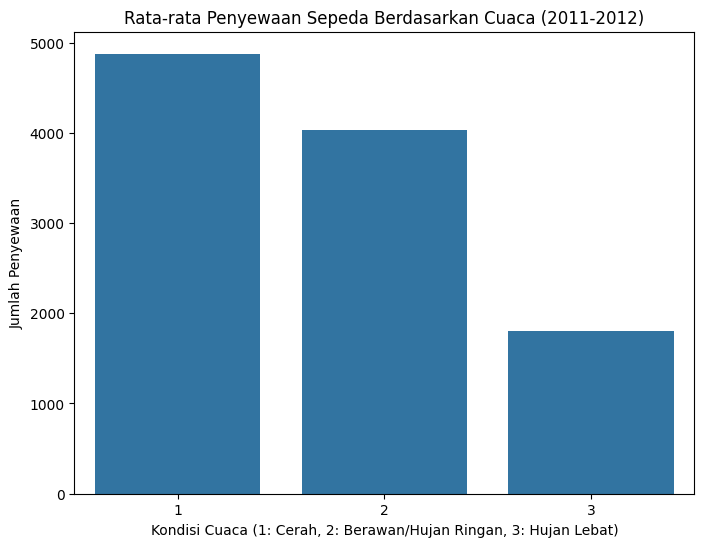

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca (2011-2012)')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berawan/Hujan Ringan, 3: Hujan Lebat)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

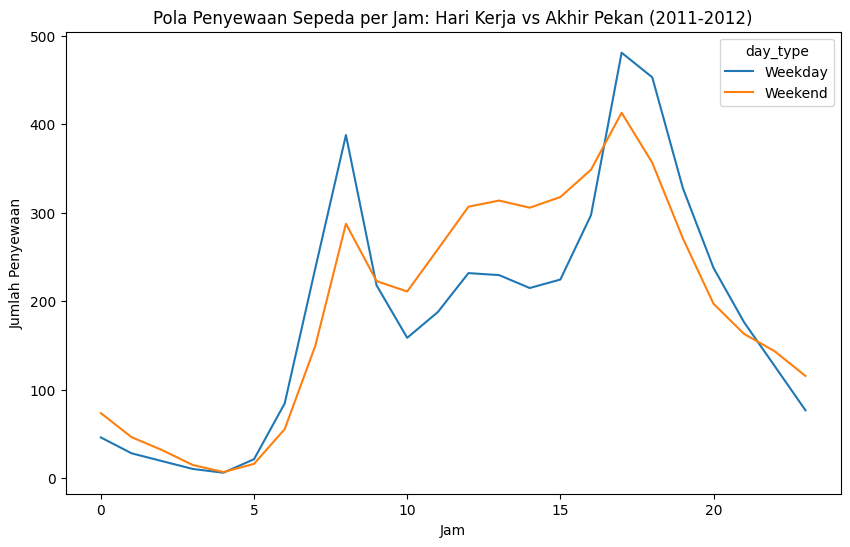

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='day_type', data=hourly_group)
plt.title('Pola Penyewaan Sepeda per Jam: Hari Kerja vs Akhir Pekan (2011-2012)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
Membuat visualisasi untuk menjawab pertanyaan bisnis:
- Bar plot untuk Pertanyaan 1: Menampilkan rata-rata penyewaan berdasarkan cuaca dengan warna yang kontras dan label jelas.
- Line plot untuk Pertanyaan 2: Menampilkan pola penyewaan per jam dengan garis berbeda untuk hari kerja dan akhir pekan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis data harian, cuaca cerah atau sedikit berawan (weathersit=1) cenderung memiliki rata-rata penyewaan sepeda harian tertinggi dibandingkan kondisi kabut/berawan (weathersit=2) atau hujan/salju ringan (weathersit=3). Hal ini menunjukkan bahwa kondisi cuaca yang baik mendorong lebih banyak orang untuk menyewa sepeda, sedangkan cuaca buruk mengurangi minat penyewaan.
- Pada hari kerja, puncak penyewaan sepeda terjadi pada jam sibuk pagi dan sore, yang kemungkinan besar terkait dengan aktivitas perjalanan kerja. Sebaliknya, pada akhir pekan, pola penyewaan lebih merata sepanjang hari dengan peningkatan di siang hingga sore hari, mencerminkan penggunaan sepeda untuk rekreasi atau aktivitas santai.